In [0]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns 

from math import sqrt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor


## Call Boston House Price Dataset

In [22]:
boston=load_boston()
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Take a peek at the data

In [23]:
boston_data=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_data['Price']=boston.target
print(boston_data.shape)
boston_data.head(n=7)

(506, 14)


CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  Price
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2
5  0.02985   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.12   5.21   28.7
6  0.08829  12.5   7.87   0.0  0.524  ...  311.0     15.2  395.60  12.43   22.9

[7 rows x 14 columns]

Get the features

In [24]:
boston_data_feature=boston_data.drop('Price',axis=1)
boston_data_feature.head(n=7)

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
5  0.02985   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.12   5.21
6  0.08829  12.5   7.87   0.0  0.524  ...  5.0  311.0     15.2  395.60  12.43

[7 rows x 13 columns]

Get the price

In [25]:
boston_data_target=boston_data['Price']
boston_data_target.head(n=7)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
Name: Price, dtype: float64

Split the dataset into train and test

In [0]:
X_train,X_test,y_train,y_test=train_test_split(boston_data_feature,boston_data_target
                                               ,test_size=0.3,random_state=6738)

### Exploratory data analysis

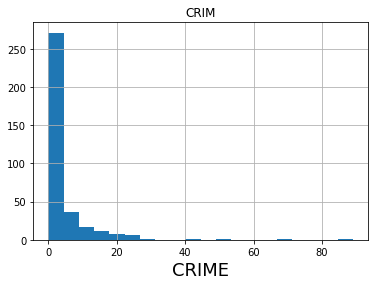

In [27]:
X_train.hist(column = 'CRIM', bins = 20)
plt.xlabel('CRIME', fontsize=18)
plt.show()

Correlations matrix and Heat Map

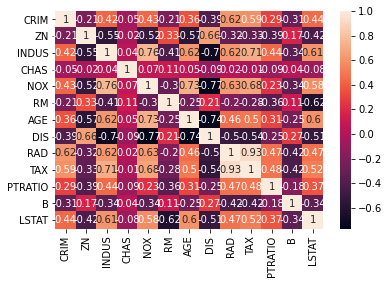

In [28]:
correlation_matrix = X_train.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

### Check Multicollinearity with Variance Inflation Factor (VIF)

In [33]:
p=X_train.shape[1]
print(p)
vif = [variance_inflation_factor(X_train.values, i) for i in range(p)]
vif = pd.Series(vif,index=X_train.columns)
print(vif)

13
CRIM        2.072010
ZN          2.768058
INDUS      13.706272
CHAS        1.141818
NOX        80.274020
RM         79.242925
AGE        21.383367
DIS        14.641810
RAD        18.098453
TAX        68.261808
PTRATIO    90.469381
B          20.039552
LSTAT      10.555388
dtype: float64


Fit Simple lineare regression model

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
y_train_pred = lr.predict(X_train)
train_lr_mse = mean_squared_error(y_train, y_train_pred)
print('--- Linear Regression ---')
print('In-sample MSE = ', round(train_lr_mse,2))

y_test_pred = lr.predict(X_test)
test_lr_mse = mean_squared_error(y_test, y_test_pred )
print('Out-sample MSE = ',round(test_lr_mse,2))


--- Linear Regression ---
In-sample MSE =  21.63
Out-sample MSE =  24.81


Fit Ridge Regression with low $\alpha$ value, $\alpha= 0.01$

In [36]:
rr_low = Ridge(alpha=0.01)
rr_low.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [37]:
y_train_pred = rr_low.predict(X_train)
train_rr_low_mse = mean_squared_error(y_train, y_train_pred)
print('--- Ridge Regression with alpha = 0.01 ---')
print('In-sample MSE = ', round(train_rr_low_mse,2))

y_test_pred = rr_low.predict(X_test)
test_rr_low_mse = mean_squared_error(y_test, y_test_pred )
print('Out-sample MSE = ',round(test_rr_low_mse,2))

--- Ridge Regression with alpha = 0.01 ---
In-sample MSE =  21.63
Out-sample MSE =  24.8


Fit Ridge regression with high alpha value

In [38]:
rr_high = Ridge(alpha=100) 
rr_high.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [39]:
y_train_pred = rr_high.predict(X_train)
train_rr_high_mse = mean_squared_error(y_train, y_train_pred)
print('--- Ridge Regression with alpha = 100 ---')
print('In-sample MSE = ', round(train_rr_low_mse,2))

y_test_pred = rr_high.predict(X_test)
test_rr_high_mse = mean_squared_error(y_test, y_test_pred )
print('Out-sample MSE = ',round(test_rr_high_mse,2))

--- Ridge Regression with alpha = 100 ---
In-sample MSE =  21.63
Out-sample MSE =  28.05


Fit Ridge Regression with different alpha

In [40]:
regressor = RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10], store_cv_values=True)
regressor.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]), cv=None,
        fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=True)

In [41]:
cv_mse = np.mean(regressor.cv_values_, axis=0)
print(cv_mse)

[24.25431799 24.25424097 24.2535756  24.25564981 24.48863343 25.04209892]


In [42]:
# Best alpha
print(regressor.alpha_)

0.01


Search best alpha over 1000 different choices of alpha

In [43]:
alph= np.r_[1:1000]/10000
regressor = RidgeCV(alphas=alph, store_cv_values=True)
regressor.fit(X_train, y_train)

RidgeCV(alphas=array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024,
       0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032,
       0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004 ,
       0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0...
       0.0961, 0.0962, 0.0963, 0.0964, 0.0965, 0.0966, 0.0967, 0.0968,
       0.0969, 0.097 , 0.0971, 0.0972, 0.0973, 0.0974, 0.0975, 0.0976,
       0.0977, 0.0978, 0.0979, 0.098 , 0.0981, 0.0982, 0.0983, 0.0984,
       0.0985, 0.0986, 0.0987, 0.0988, 0.0989, 0.099 , 0.0991, 0.0992,
       0.0993, 0.0994, 0.0995, 0.0996, 0.0997, 0.0998, 0.0999]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=True)

In [0]:
cv_mse = np.mean(regressor.cv_values_, axis=0)



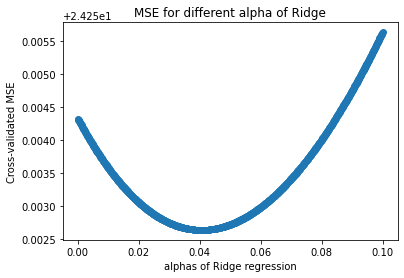

In [45]:
plt.scatter(alph, cv_mse);
plt.title('MSE for different alpha of Ridge')
plt.xlabel('alphas of Ridge regression')
plt.ylabel('Cross-validated MSE')
plt.show()


In [48]:
# Best alpha
best_alpha =regressor.alpha_
print(best_alpha)

0.0405


Fit Ridge regression with best alpha

In [50]:
rr_best = Ridge(alpha=best_alpha) 
rr_best.fit(X_train, y_train)

Ridge(alpha=0.0405, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [51]:
y_train_pred = rr_best.predict(X_train)
train_rr_best_mse = mean_squared_error(y_train, y_train_pred)
print('--- Ridge Regression with best alpha ---')
print('In-sample MSE = ', round(train_rr_best_mse,2))

y_test_pred = rr_best.predict(X_test)
test_rr_best_mse = mean_squared_error(y_test, y_test_pred )
print('Out-sample MSE = ',round(test_rr_best_mse,2))

--- Ridge Regression with best alpha ---
In-sample MSE =  21.63
Out-sample MSE =  24.78


Comparing the results

In [52]:
MSEdf = [['Linear regression',round(train_lr_mse,3),round(test_lr_mse,3)]
         ,['Ridge Regression a = 0.01',round(train_rr_low_mse,3),round(test_rr_low_mse,3)]
         ,['Ridge Regression a = 100',round(train_rr_high_mse,3),round(test_rr_high_mse,3)]
         ,['Ridge Regression best a = 0.0404',round(train_rr_best_mse,3),round(test_rr_best_mse,3)]]
MSEdf = pd.DataFrame(MSEdf,columns=['Method','In-Sample','Ou-Sample'])
print(MSEdf)

                             Method  In-Sample  Ou-Sample
0                 Linear regression     21.627     24.806
1         Ridge Regression a = 0.01     21.627     24.800
2          Ridge Regression a = 100     23.883     28.048
3  Ridge Regression best a = 0.0404     21.629     24.784
